<a href="https://colab.research.google.com/github/Lamalz/CPCS433_Project/blob/main/DecisionTree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/hw/Crop_recommendation.csv')

In [ ]:
# Print the first few rows of the DataFrame
df.head()

,temperature,humidity,ph,water availability,season,label
0,20.879744,82.002744,6.502985,202.935536,rainy,rice
1,21.770462,80.319644,7.038096,226.655537,rainy,rice
2,23.004459,82.320763,7.840207,263.964248,rainy,rice
3,26.491096,80.158363,6.980401,242.864034,rainy,rice
4,20.130175,81.604873,7.628473,262.717340,rainy,rice


In [ ]:
df.shape

(1400, 6)

In [ ]:
df.isnull().sum()

temperature           0
humidity              0
ph                    0
water availability    0
season                0
label                 0
dtype: int64

In [ ]:
print(df.dtypes)

temperature           float64
humidity              float64
ph                    float64
water availability    float64
season                 object
label                  object
dtype: object


In [ ]:
df['season'].unique()

array(['rainy', 'winter', 'spring', 'summer'], dtype=object)

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'watermelon',
       'muskmelon', 'cotton', 'jute'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['season'] = label_encoder.fit_transform(df['season'])

In [ ]:
df['season'].unique()

array([0, 3, 1, 2])

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'watermelon',
       'muskmelon', 'cotton', 'jute'], dtype=object)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((1120, 5), (280, 5))

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion' : ["entropy","gini"] ,'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, refit=True , verbose= 3)
grid_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_split=2;, score=0.639 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_split=2;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_split=2;, score=0.596 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_split=2;, score=0.596 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_split=5;, score=0.632 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_split=5;, score=0.636 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_split=5;, score=0.604 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [ ]:
#print best hyperparameter after tuning
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}


In [ ]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 7, min_samples_split = 2)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:', accuracy)

Accuracy: 0.9821428571428571


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9955
Test set score: 0.9821


[Text(0.5370370370370371, 0.9375, 'x[1] <= 74.862\nentropy = 3.663\nsamples = 1120\nvalue = [78, 78, 86, 82, 80, 77, 161, 78, 79, 80, 80, 81\n80]'),
 Text(0.2222222222222222, 0.8125, 'x[1] <= 27.685\nentropy = 2.868\nsamples = 655\nvalue = [78, 78, 0, 23, 80, 77, 161, 78, 0, 0, 80, 0, 0]'),
 Text(0.07407407407407407, 0.6875, 'x[4] <= 2.0\nentropy = 1.0\nsamples = 158\nvalue = [0, 78, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.037037037037037035, 0.5625, 'entropy = 0.0\nsamples = 80\nvalue = [0, 0, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 78\nvalue = [0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.37037037037037035, 0.6875, 'x[3] <= 74.951\nentropy = 2.412\nsamples = 497\nvalue = [78, 0, 0, 23, 0, 77, 161, 78, 0, 0, 80, 0, 0]'),
 Text(0.18518518518518517, 0.5625, 'x[4] <= 2.5\nentropy = 1.981\nsamples = 285\nvalue = [78, 0, 0, 0, 0, 77, 52, 78, 0, 0, 0, 0, 0]'),
 Text(0.1111111111111111, 0.4375, 'x[4] <= 1.0\nentropy = 1.442\

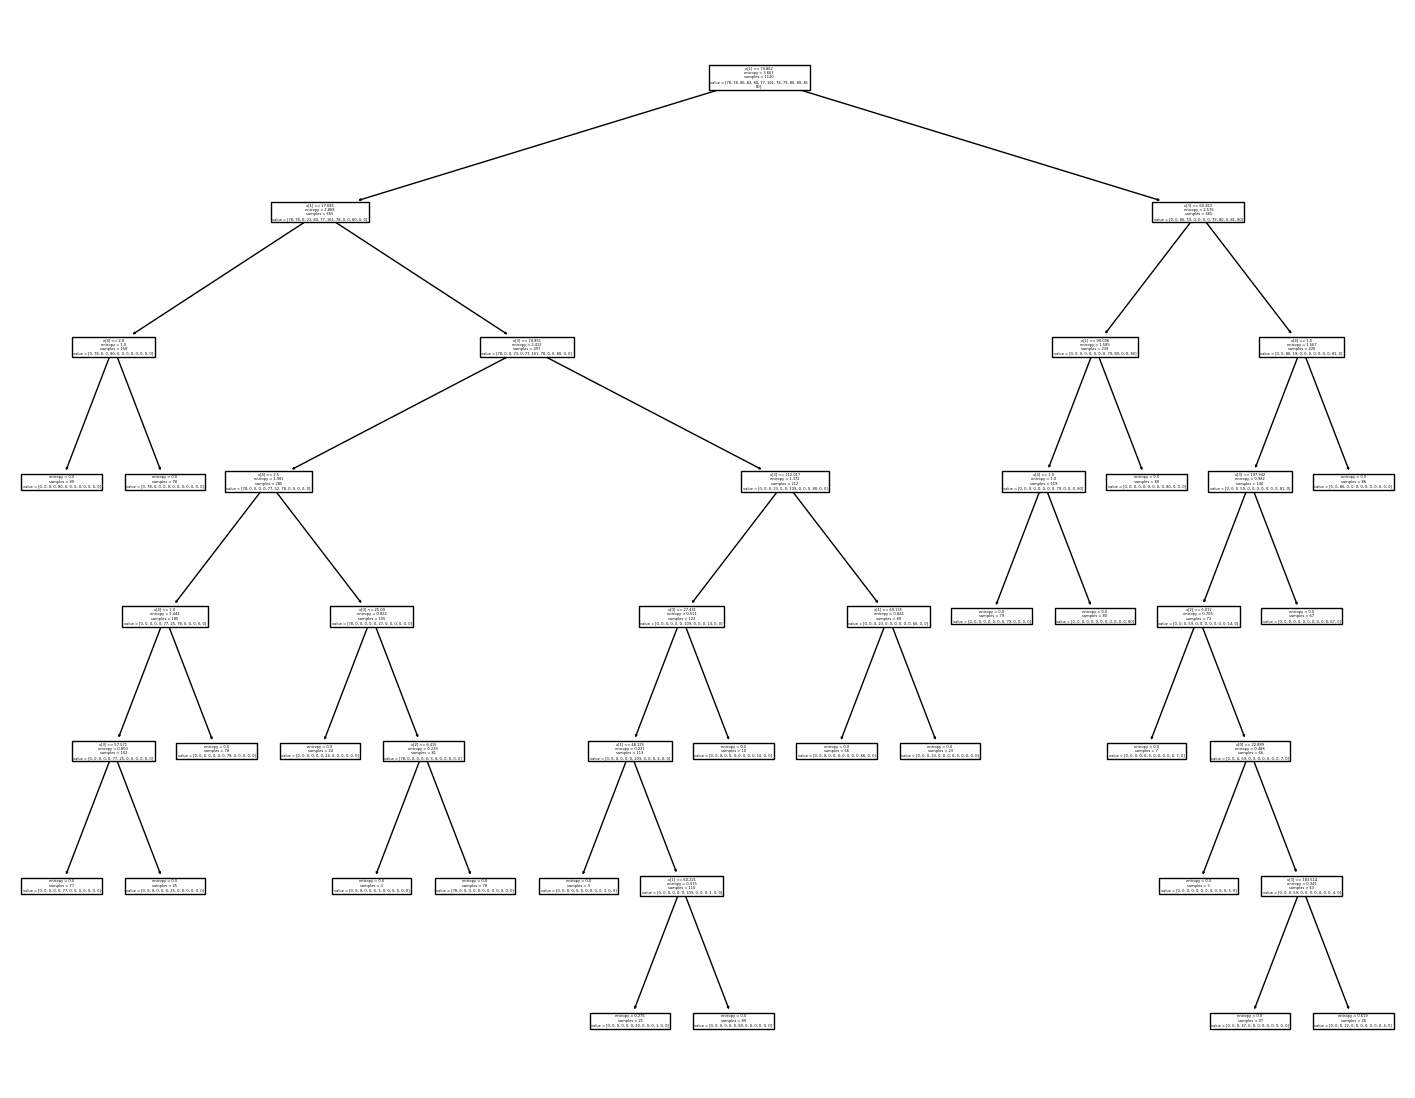

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,14))

from sklearn import tree

tree.plot_tree(model.fit(X_train, y_train))

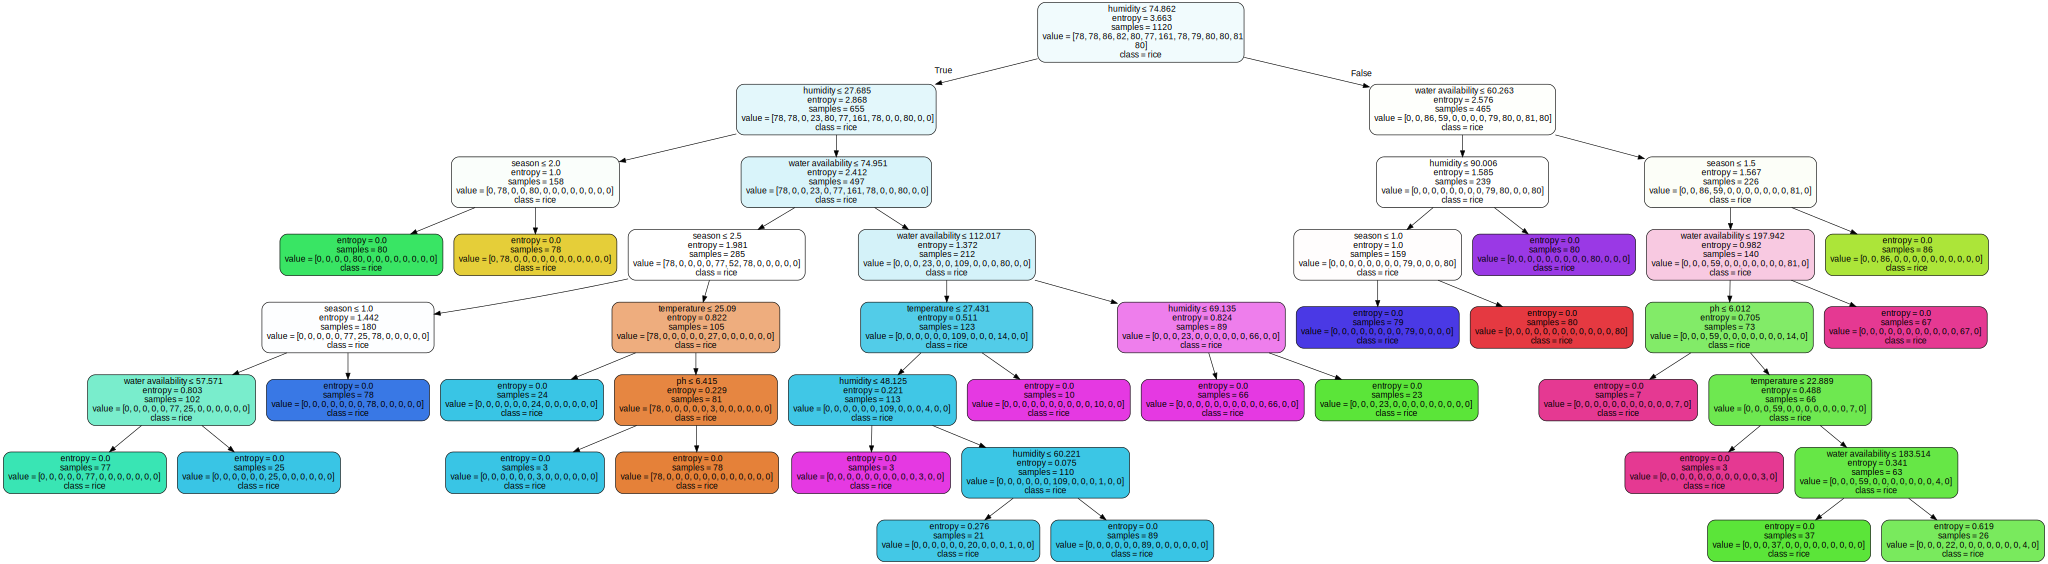

In [ ]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
conf_matrix = confusion_matrix(y_test,  y_pred)
print(conf_matrix)

[[22  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 39  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  1  0  0  2  0  0  0 17  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20]]


In [ ]:
classification_rep = classification_report(y_test,  y_pred)
print(classification_rep)

              precision    recall  f1-score   support

   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        14
        jute       0.86      1.00      0.92        18
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        23
       maize       0.95      1.00      0.97        39
   mothbeans       1.00      1.00      1.00        22
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        20
  pigeonpeas       1.00      0.85      0.92        20
        rice       1.00      0.89      0.94        19
  watermelon       1.00      1.00      1.00        20

    accuracy                           0.98       280
   macro avg       0.99      0.98      0.98       280
weighted avg       0.98      0.98      0.98       280



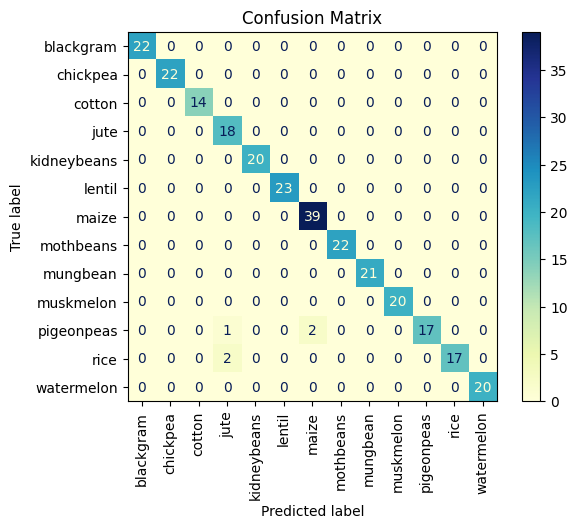

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='YlGnBu')
cm.ax_.set_title('Confusion Matrix')
cm.ax_.set_xticklabels(cm.ax_.get_xticklabels(), rotation=90)
plt.show()



In [ ]:
print(X.columns)
model.feature_importances_

Index(['temperature', 'humidity', 'ph', 'water availability', 'season'], dtype='object')


array([0.02854778, 0.45600103, 0.00925985, 0.27831424, 0.2278771 ])

- The feature with the highest importance score (0.45600103) is by far the most influential in the model's decision-making process.